In [ ]:
import pandas as pd
import numpy as np

In [ ]:
advt = pd.read_csv("advertising.csv")
advt.shape

(200, 5)

In [ ]:
advt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


 1. numeric & categoric (ordinal: can be ordered)
 2. numeric variables (one at a time) : univariate analysis : 
     * mean, median, std, percentiles
     * histogram, boxplot
 3. 2 numeric variables : bivariate analysis :
     * correlation, scateer plot, joint-plot (seaborn)
 4. more 2 variables : linear regression (analysis, infering, prediction(ML))

In [ ]:
advt = advt[['TV','Radio','Newspaper','Sales']]

In [ ]:
advt.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# sales
advt['Sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

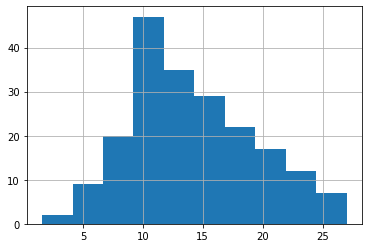

In [ ]:
advt['Sales'].hist()

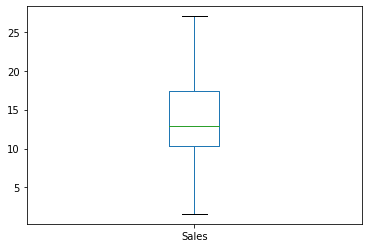

In [ ]:
advt['Sales'].plot(kind='box')

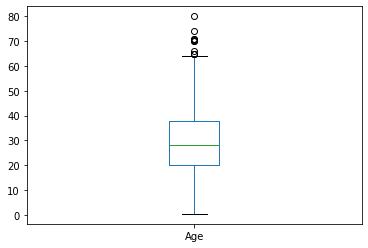

In [ ]:
titanic_df = pd.read_csv("titanic/train.csv")
titanic_df['Age'].plot(kind='box')

In [ ]:
import seaborn as sns

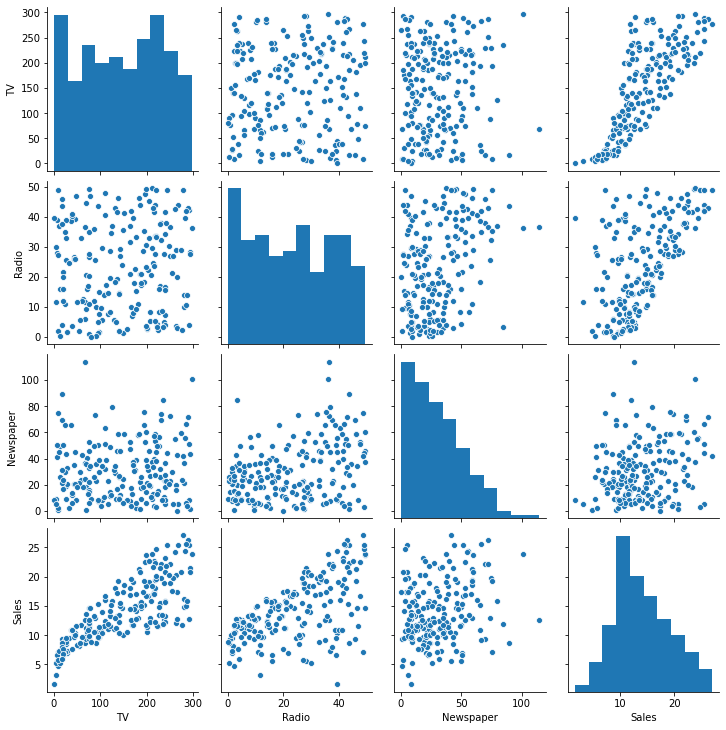

In [ ]:
sns.pairplot(advt[['TV','Radio','Newspaper','Sales']])

In [ ]:
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


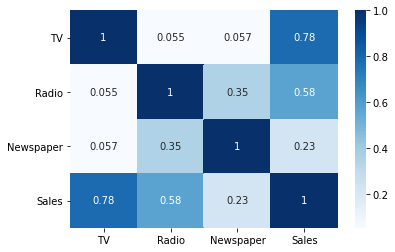

In [ ]:
sns.heatmap(advt.corr(), annot=True, cmap='Blues')

In [ ]:
advt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = advt[['TV','Radio','Newspaper']]
y = advt['Sales']

X.shape, y.shape

((200, 3), (200,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.metrics import mean_squared_error

In [ ]:
import sklearn.preprocessing

In [ ]:
sc = preprocessing.StandardScaler()

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X) # numpy array
X_std.shape

(200, 3)

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.75, test_size=0.25, random_state=100)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [ ]:
# model training
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train) # training the model --> building the ML model --> learn the linear relationship 

LinearRegression()

In [ ]:
regr.coef_ # to get the coefficients of the model

array([3.91328086, 2.78383682, 0.10287819])

In [ ]:
regr.intercept_

13.892203878707937

In [ ]:
regr.predict(X_train).shape

(150,)

In [ ]:
y_pred_train = regr.predict(X_train) # y_hat (training data)
y_pred_train.shape

(150,)

In [ ]:
y_train.shape # actual (training data)

(150,)

In [ ]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.89436812387285

In [ ]:
# mse (mean squared error)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train)

3.0987877984057626

In [ ]:
# root mean squared error (rmse)
np.sqrt(mean_squared_error(y_train, y_pred_train))

1.7603374103863618

In [ ]:
test_data = pd.DataFrame(X_test, columns=['TV','Radio','Newspaper'])
test_data.head()

,TV,Radio,Newspaper
0,-1.625918,1.055798,0.922754
1,1.064435,0.745190,-1.162487
2,-0.138283,1.244864,0.706404
3,0.825059,0.691171,1.309421
4,1.105304,0.995027,-0.338518


In [ ]:
test_data['Sales_actual'] = list(y_test)
test_data.head()

,TV,Radio,Newspaper,Sales_actual
0,-1.625918,1.055798,0.922754,6.6
1,1.064435,0.745190,-1.162487,20.7
2,-0.138283,1.244864,0.706404,17.2
3,0.825059,0.691171,1.309421,19.4
4,1.105304,0.995027,-0.338518,21.8


In [ ]:
# TEST
y_pred_test = regr.predict(X_test) # unseen data for model
y_pred_test.shape

(50,)

In [ ]:
test_data['Sales_predicted'] = list(y_pred_test)
test_data.head()

,TV,Radio,Newspaper,Sales_actual,Sales_predicted
0,-1.625918,1.055798,0.922754,6.6,10.563633
1,1.064435,0.745190,-1.162487,20.7,20.012530
2,-0.138283,1.244864,0.706404,17.2,16.889235
3,0.825059,0.691171,1.309421,19.4,19.179710
4,1.105304,0.995027,-0.338518,21.8,20.952736


In [ ]:
y_pred_test

array([10.56363317, 20.01252968, 16.88923482, 19.17971   , 20.95273624,
       13.17442263, 11.82537703, 12.37054122, 20.56982613, 20.94292585,
       10.79961849, 19.56532253,  6.43553509, 15.24813207,  8.9807264 ,
        7.91927124, 16.21621278, 12.06554669, 17.07900185, 11.26788599,
       16.99640501,  9.78797898, 20.80106504, 17.20499594, 15.15601527,
       21.94787225, 19.20984348, 10.06599636, 19.3644989 , 14.8430621 ,
       14.31436678,  7.56075101,  9.99407381, 14.78786958,  7.20776361,
       13.58613467,  7.52095356, 11.74563467, 13.51907415, 15.25349784,
       17.20703351, 13.59014544, 14.32532783, 13.78453325, 11.88713975,
        8.78422153, 12.06547871, 19.2268265 ,  9.08224572,  5.16178056])

In [ ]:
# r2 score for test
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))

0.9018593061633755


In [ ]:
# errors --> asumptions (residuals)
# normal, mean=0, no pattern (homoskedastic) [residual vs y^]

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
type(y_pred_train)

numpy.ndarray

In [ ]:
residuals = y_train-y_pred_train # y-y^
residuals.shape

(150,)

In [ ]:
y_pred_train.shape

(150,)

In [ ]:
residuals

40     0.349925
153    0.875961
115   -0.315744
64     1.171849
59     0.527415
         ...   
87     0.355135
103    0.140620
67     1.605388
24     1.742688
8      1.352164
Name: Sales, Length: 150, dtype: float64

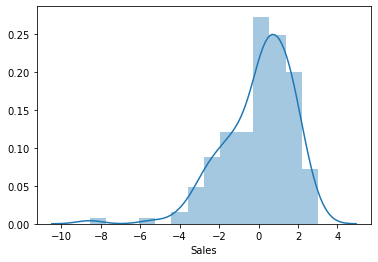

In [ ]:
import seaborn as sns
sns.distplot(residuals)

In [ ]:
residuals.mean()

2.2855791333616555e-15

(-10.0, 10.0)

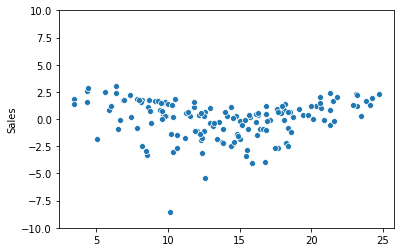

In [ ]:
import matplotlib.pyplot as plt

p = sns.scatterplot(x=y_pred_train, y=residuals)
plt.ylim(-10,10)

In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
fitted_model = model.fit()

In [ ]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        22:55:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""